In [1]:
#! pip3 install statsmodels
import methylize
import pandas as pd
from pathlib import Path
betas = pd.read_pickle(Path('/Volumes/LEGX/P64/Project_064_test/beta_values.pkl'))
sample = betas.sample(30000)
pheno0 = [1,1,0,0,1,1,0,0]

In [2]:
stats = methylize.diff_meth_pos(sample, pheno0, regression_method='linear', statsmodels_OLS=True)

INFO:methylize.diff_meth_pos:using statsmodels.OLS


  0%|          | 0/24835 [00:00<?, ?it/s]

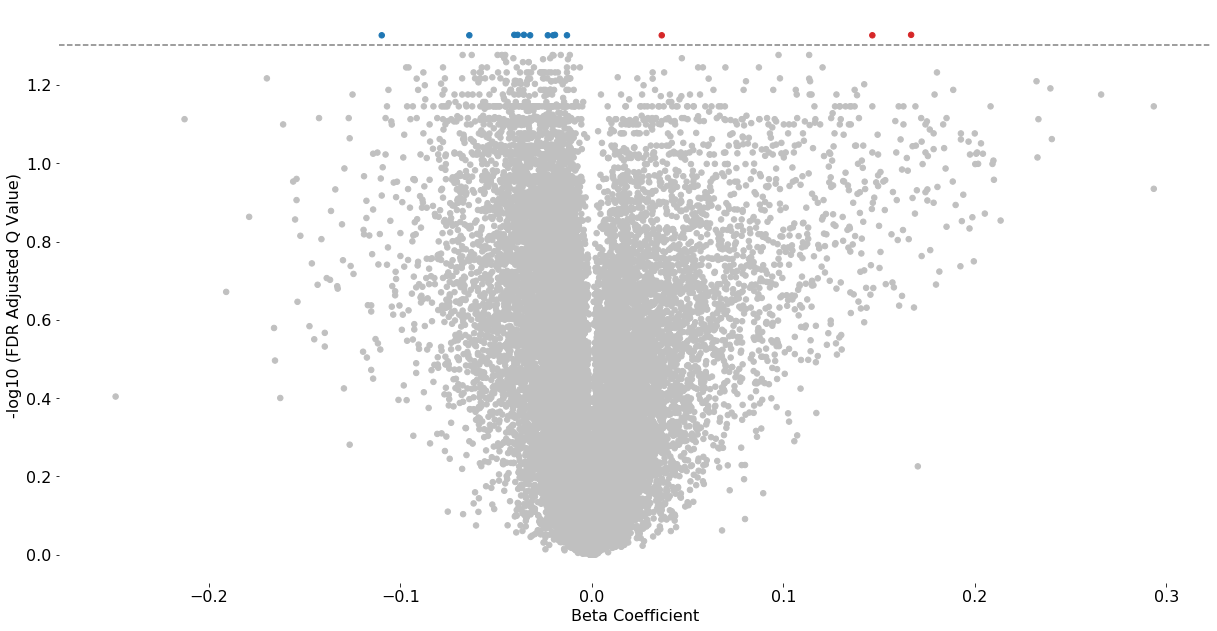

In [3]:
methylize.volcano_plot(stats)

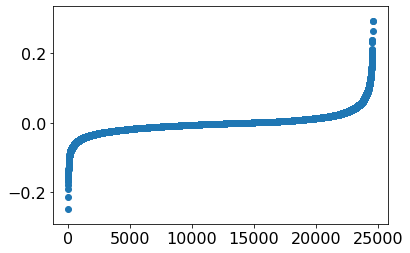

In [4]:
import matplotlib.pyplot as plt
#import math
#stats.Coefficient.apply(lambda x: math.log2(x))
plt.scatter(range(len(stats)), stats.sort_values('Coefficient').Coefficient)

  0%|          | 0/24835 [00:00<?, ?it/s]

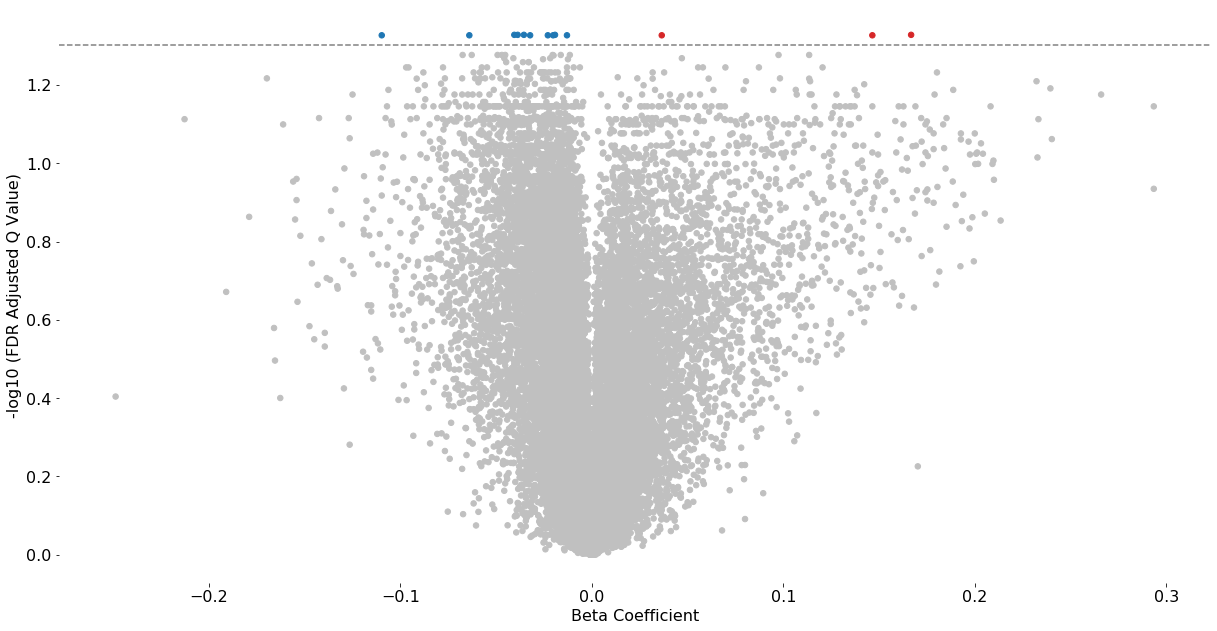

,Coefficient,StandardError,PValue,95%CI_lower,95%CI_upper,Rsquared,FDR_QValue
cg11302401_II_F_C_rep1_EPIC,0.16675,0.011992,0.000009,0.984112,0.985527,0.969902,0.047019
cg02201081_II_F_C_rep1_EPIC,-0.03875,0.002765,0.000008,-0.985225,-0.984904,0.970354,0.047019
cg01814069_II_F_C_rep1_EPIC,-0.03550,0.002541,0.000008,-0.985120,-0.984822,0.970169,0.047019
cg05995891_II_R_C_rep1_EPIC,-0.04050,0.002407,0.000003,-0.989670,-0.989474,0.979254,0.047019
cg13843369_II_R_C_rep1_EPIC,-0.01925,0.001407,0.000009,-0.984438,-0.984266,0.968949,0.047019
...,...,...,...,...,...,...,...
cg00097121_II_F_C_rep1_EPIC,0.00050,0.035170,0.989118,-0.063045,0.074598,0.000034,0.999664
cg12875241_I_R_C_rep1_EPIC,-0.00100,0.070496,0.989142,-0.142973,0.131610,0.000034,0.999664
cg16640525_II_F_C_rep1_EPIC,0.00075,0.052625,0.989091,-0.097019,0.108532,0.000034,0.999664
cg17074637_II_R_C_rep1_EPIC,-0.00100,0.070603,0.989159,-0.143171,0.131826,0.000033,0.999664


In [5]:
stats2 = methylize.diff_meth_pos(sample, [1,1,0,0,1,1,0,0], regression_method='linear')
methylize.volcano_plot(stats2)
stats2

INFO:methylprep.files.manifests:Reading manifest file: CombinedManifestEPIC_manifest_CoreColumns_v2.csv


Total probes to plot: 24575
01 2320 | 02 1771 | 03 1386 | 04 928 | 05 1182 | 06 1581 | 07 1321 | 08 1055 | 09 795 | 10 1220 | 11 1473 | 12 1281 | 13 596 | 14 839 | 15 840 | 16 1095 | 17 1292 | 18 442 | 19 1071 | 20 724 | 21 268 | 22 522 | X 573


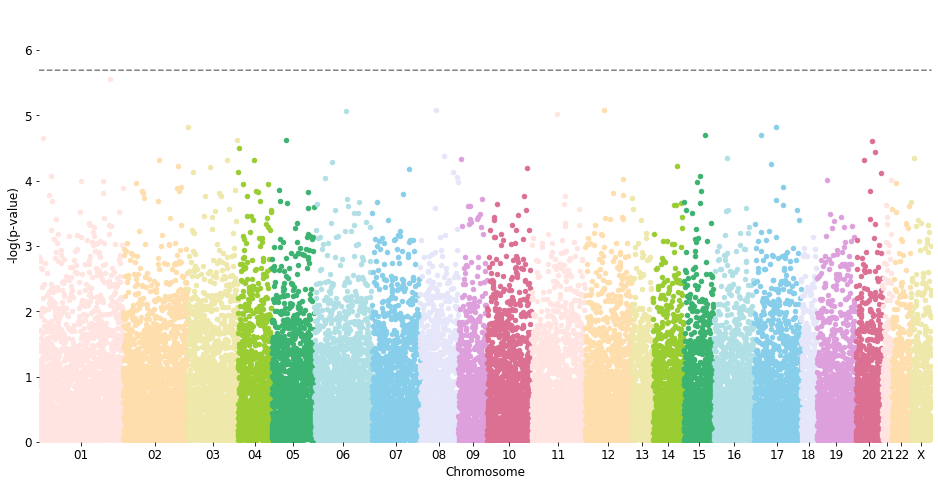

In [6]:
methylize.manhattan_plot(stats, 'epic+')

INFO:methylprep.files.manifests:Reading manifest file: CombinedManifestEPIC_manifest_CoreColumns_v2.csv


Total probes to plot: 24575
01 2320 | 02 1771 | 03 1386 | 04 928 | 05 1182 | 06 1581 | 07 1321 | 08 1055 | 09 795 | 10 1220 | 11 1473 | 12 1281 | 13 596 | 14 839 | 15 840 | 16 1095 | 17 1292 | 18 442 | 19 1071 | 20 724 | 21 268 | 22 522 | X 573


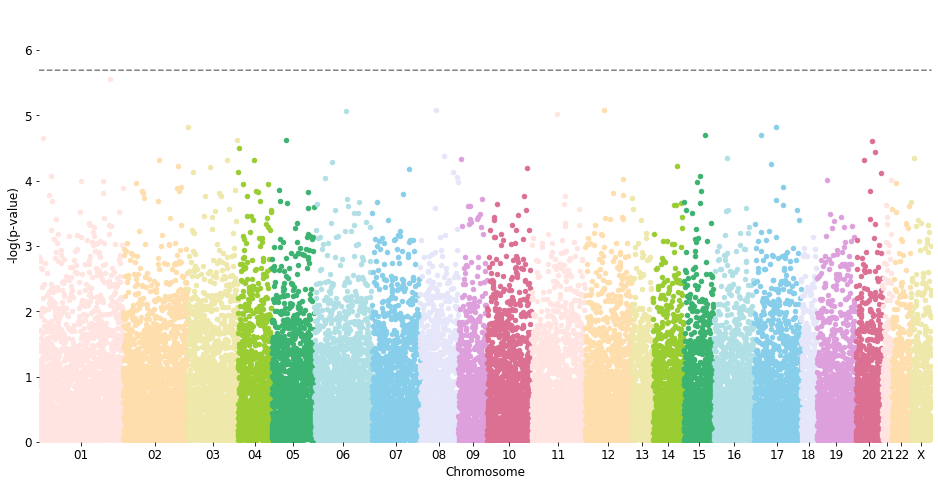

In [7]:
methylize.manhattan_plot(stats2, 'epic+')

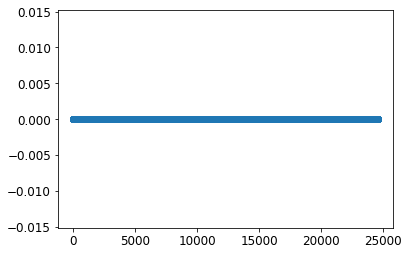

In [8]:
import matplotlib.pyplot as plt
#test = pd.concat([stats.Coefficient, stats2.Coefficient], join='inner', axis=1)
test = stats[['Coefficient']].merge(stats2[['Coefficient']], how='inner', right_index=True, left_index=True, suffixes=('_ols', '_sci'))
plt.scatter( range(len(test)), abs(test.Coefficient_ols - test.Coefficient_sci))

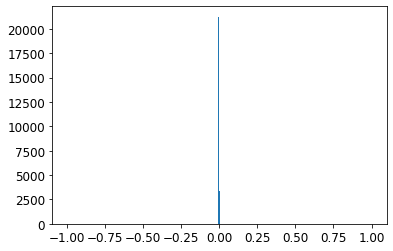

In [9]:
blah = plt.hist((test.Coefficient_ols - test.Coefficient_sci), bins=300, range=[-1,1])

  0%|          | 0/30000 [00:00<?, ?it/s]

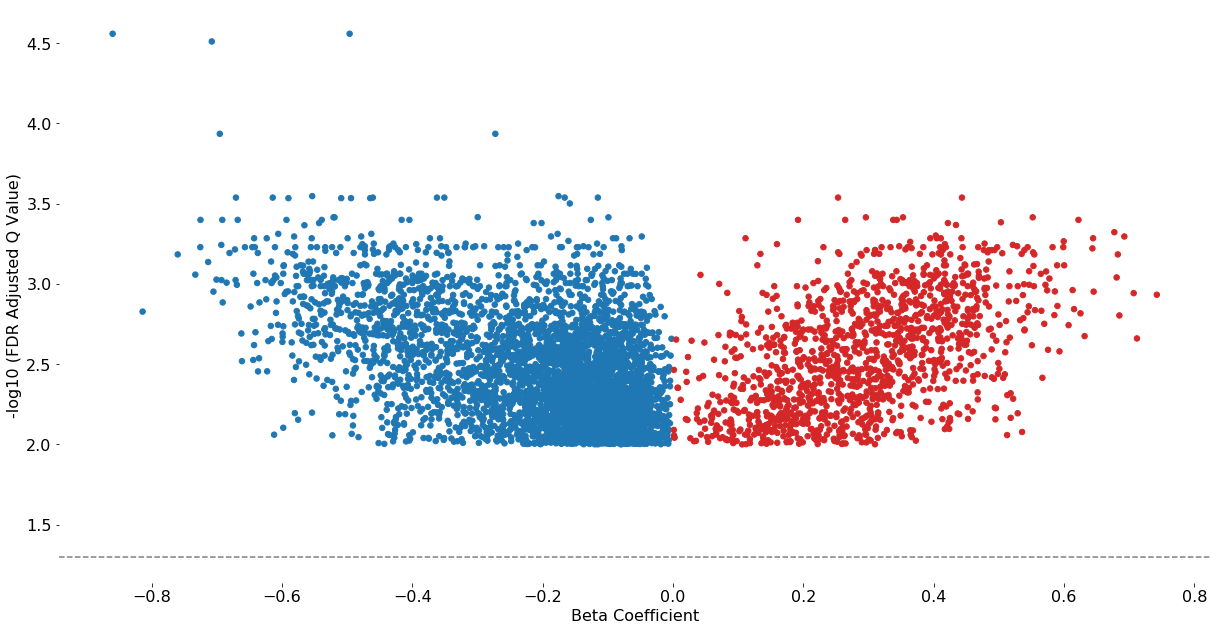

In [12]:
b450 = pd.read_pickle(Path('/Users/mmaxmeister/methylize/data/GSE69852_beta_values.pkl'))
bsample = b450.sample(30000)
pheno = ['fetal','fetal','fetal','adult','adult','adult']
pheno0 = [0,0,0, 1,1,1]
bstats = methylize.diff_meth_pos(bsample, pheno0, q_cutoff=0.01)
methylize.volcano_plot(bstats)

INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv


Total probes to plot: 5580
01 614 | 02 411 | 03 315 | 04 208 | 05 256 | 06 398 | 07 346 | 08 235 | 09 113 | 10 270 | 11 372 | 12 257 | 13 127 | 14 168 | 15 173 | 16 265 | 17 387 | 18 40 | 19 259 | 20 104 | 21 52 | 22 110 | X 96 | Y 4


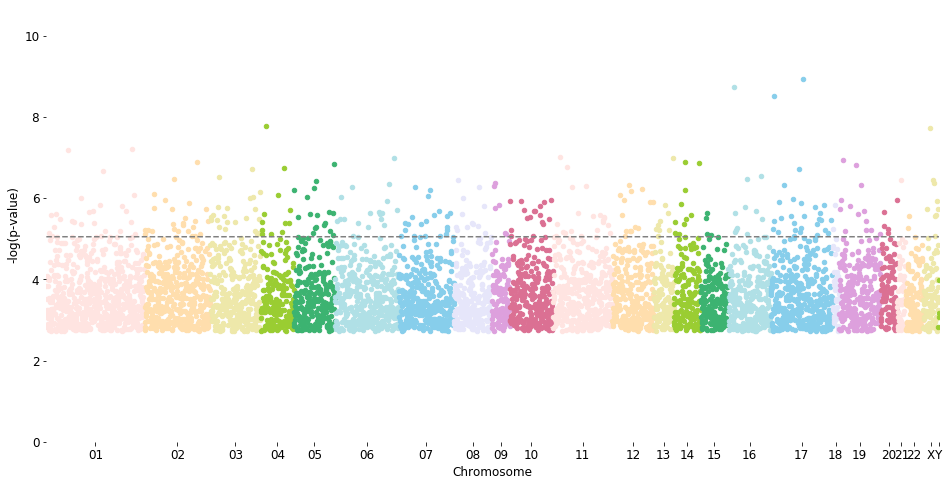

In [13]:
methylize.manhattan_plot(bstats, '450k')